# Perbandingan Optimizer pada Model Pre-Trained : DenseNet201 dalam Mengklasifikasi Gambar Hewan
### Reyhan Devara
### Kelas : Ewako



# 1. Library

In [ ]:
#Deklarasi library yang digunakan dalam program
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

Program diatas digunakan untuk mendeklarasikan libray yang digunakan dalam program klasifikasi hewan. Library yang digunakan cukup banyak, yaitu tensorflow dan keras untuk deep learning, numpy untuk proses matematika, pandas untuk dataframe, seaborn dan matplotlib untuk visualisasi data, cv2 pengembangan suatu citra, random untuk komputasi secara random, dan os untuk akses sistem operasi.

In [ ]:
# Mounting dengan google drive untuk menggunakan dataset
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Program diatas digunakan untuk menyambungkan antara drive colab dengan file yang ada pada drive dari akun google yang digunakan. Hal ini dilakukan karena kita ingin menggunakan dataset yang ada pada google drive dari akun pengguna.

In [ ]:
# Deklarasi dataset yang digunakan
dataset = '/content/drive/MyDrive/Dataset Colab/4animal'

Karena gdrive tadi sudah kita mount dengan drive colab, kita panggil folder dataset yang kita gunakan dan simpan pada variabel dataset

# 2. Visualisasi data

In [ ]:
#Melihat isi dari folder dataset
os.listdir(dataset)

['Sample_submission.csv', 'test', 'train']

Program diatas digunakan untuk melihat isi dari folder dataset yang sudah kita deklarasikan tadi. Pada folder dataset terdapat 2 folder dan 1 file, yaitu 'Sample_submission.csv', 'test', dan 'train'

In [ ]:
# Melihat isi dari folder train
os.listdir(dataset+'/train')

['deer', 'dog', 'horse', 'cat']

Kita coba ingin melihat isi dari folder train. Pada folder tersebut terdapat 4 folder yang digunakan untuk train

In [ ]:
# Menghitung isi di salah satu folder train
len(os.listdir(dataset+'/train'+'/'+'deer'))

600

Kita coba melihat jumlah data yang ada disalah satu folder train. Pada folder deer terdapat 600 jumlah data, artinya terdapat 600 gambar kuda yang dijadikan data training

In [ ]:
# Deklarasi setiap jumlah folder data train
deer = len(os.listdir(dataset+'/train/deer'))
print(f"Terdapat {deer} Gambar training deer")
dog = len(os.listdir(dataset+'/train/dog'))
print(f"Terdapat {dog} Gambar training dog")
horse = len(os.listdir(dataset+'/train/horse'))
print(f"Terdapat {horse} Gambar training horse")
cat = len(os.listdir(dataset+'/train/cat'))
print(f"Terdapat {cat} Gambar training cat")

Terdapat 600 Gambar training deer
Terdapat 900 Gambar training dog
Terdapat 600 Gambar training horse
Terdapat 700 Gambar training cat


Kita deklarasikan setiap jumlah gambar pada folder train pada variable yang sudah kita tentukan. Hal ini dilakukan agar kita dapat membuat visualisasi dari data training yang kita gunakan

In [ ]:
# Membuat dataframe data training
df = pd.DataFrame({'Animals':['deer','dog','horse','cat'],
                   'Sample':[deer,dog,horse,cat]})
df

,Animals,Sample
0,deer,600
1,dog,900
2,horse,600
3,cat,700


Lalu kita buatkan dataframe dari datatrain yang kita gunakan agar terlihat lebih jelas

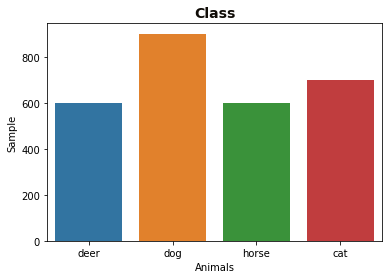

In [ ]:
# Visualisasi setiap data training dengan barplot
plt.title('Class', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
sns.barplot(x=df['Animals'],y=df['Sample'])


Kemudikan kita buat dalam bentuk barplot pada setiap data training tersebut

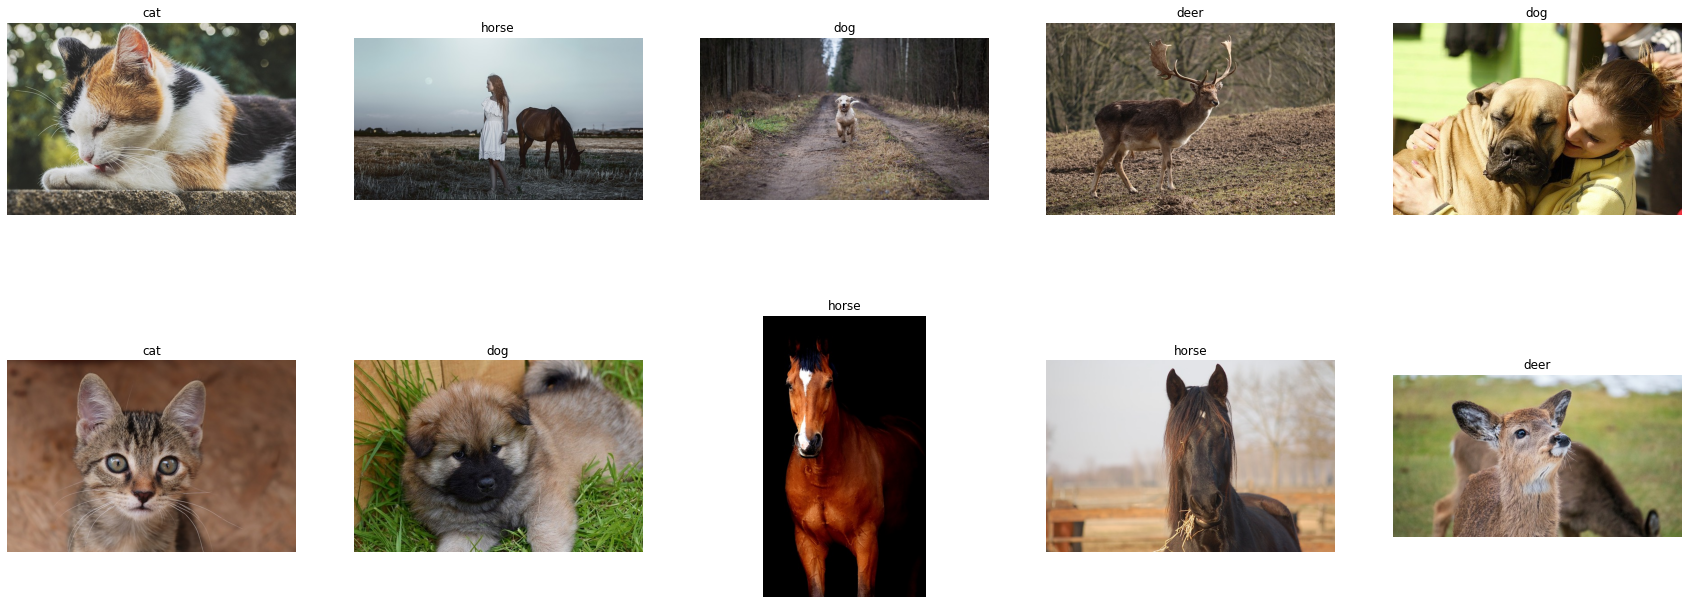

In [ ]:
# Melihat data train secara random
classes = os.listdir(dataset+'/train')

plt.figure(figsize=(30 , 30))
for x in range(10):
    i = random.randint(0,3)                    # getting the class
    images = os.listdir(dataset+'/train'+'/'+classes[i])
    j = random.randint(0,600)                  # getting the image
    image = cv2.imread(dataset+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

Lalu kita visualiasasikan gambar secara random dan mengecek apakah label dan isi dari data tersebut sudah sesuai.

# 3. Preprocessing data

In [ ]:
# Transformasi dataset gambar
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, validation_split=0.2)

Pada bagian ini kita mengubah format atau mentransformasikan dataset gambar yang kita gunakan menjadi parameter seperti diatas. Data validasi juga kita gunakan sebesar 20%

In [ ]:
#Deklarasi variable untuk training dan validasi
train_ds = image_datagen.flow_from_directory(
        dataset+'/train',
        subset='training',
        target_size=(224 , 224),
        batch_size=32)

val_ds = image_datagen.flow_from_directory(
        dataset+'/train',
        subset='validation',
        target_size=(224 , 224),
        batch_size=32 )

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


Kemudian kita bagi data yang ada di file train menjadi data train dan data validasi. data untuk training disimpan pada variable train_ds dan data untuk validasi disimpan pada variabel val_ds

# 4. Membuat Model CNN

### DenseNet-201 (SGD)

In [ ]:
# Transfer Learning DenseNet201
DenseNet = tf.keras.applications.DenseNet201(input_shape=(224 , 224, 3),
                                                 include_top=False,
                                                 weights='imagenet')

74850304/74836368 [==============================] - 2s 0us/step


Program ini membuat kita untuk menggunakan model transfer learning dari DenseNet201 dengan dataset yang digunakan adalah imagenet. Model disimpan pada variabel DenseNet

In [ ]:
# Model DenseNet201

model_DenseNet = Sequential()
model_DenseNet.add(DenseNet)
model_DenseNet.add(GlobalAveragePooling2D())
model_DenseNet.add(Dropout(0.2)) 
model_DenseNet.add(Flatten())
model_DenseNet.add(Dense(256, activation="relu"))
model_DenseNet.add(Dense(4, activation="softmax" , name="classification"))

Kemudian, model CNN kita buat sequential dan ditambahkan model pre-trained tadi. Setelah itu kita tambahkan beberapa layer seperti GlobalAveragePooling, dan DropOut. Kemudian pada fully connected kita flatten kan agar matriks menjadi 1D dan tambahkan dense sebanyak 256 sebagai hidden layer dengan fungsi aktivasi relu dan 4 dense sebagai output dengan fungsi aktivasi softmax. 

In [ ]:
# Menambahkan optimizer, loss, dan metrics
model_DenseNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

# Ringkasan Model
model_DenseNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 classification (Dense)      (None, 4)                 1028      
                                                        

Kemudian model tersebut kita compile dengan menambahkan optimizer, loss, dan metrics. Optimizer yang digunakan pada model ini adalah SGD dengan lr = 0.0005. Kemudian setelah semuanya terbuat, kita buat ringkasan dari model tersebut agar dapat kita analisis.

### DenseNet-201 (RMSProp)

In [ ]:
# Transfer Learning DenseNet201
DenseNet_3 = tf.keras.applications.DenseNet201(input_shape=(224 , 224, 3),
                                                 include_top=False,
                                                 weights='imagenet')

Program ini membuat kita untuk menggunakan model transfer learning dari DenseNet201 dengan dataset yang digunakan adalah imagenet. Model disimpan pada variabel DenseNet_3

In [ ]:
# Model DenseNet201
model_DenseNet_3 = Sequential()
model_DenseNet_3.add(DenseNet_3)
model_DenseNet_3.add(GlobalAveragePooling2D())
model_DenseNet_3.add(Dropout(0.2)) 
model_DenseNet_3.add(Flatten())
model_DenseNet_3.add(Dense(256, activation="relu"))
model_DenseNet_3.add(Dense(4, activation="softmax" , name="classification"))

Kemudian, model CNN kita buat sequential dan ditambahkan model pre-trained tadi. Setelah itu kita tambahkan beberapa layer seperti GlobalAveragePooling, dan DropOut. Kemudian pada fully connected kita flatten kan agar matriks menjadi 1D dan tambahkan dense sebanyak 256 sebagai hidden layer dengan fungsi aktivasi relu dan 4 dense sebagai output dengan fungsi aktivasi softmax. 

In [ ]:
# Menambahkan optimizer, loss, dan metrics
model_DenseNet_3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

# Ringkasan Model
model_DenseNet_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 classification (Dense)      (None, 4)                 1028      
                                                        

Kemudian model tersebut kita compile dengan menambahkan optimizer, loss, dan metrics. Optimizer yang digunakan pada model ini adalah RMSprop dengan lr = 0.0005. Kemudian setelah semuanya terbuat, kita buat ringkasan dari model tersebut agar dapat kita analisis.

### DenseNet-201 (Adagrad)

In [ ]:
# Transfer Learning DenseNet201
DenseNet_4 = tf.keras.applications.DenseNet201(input_shape=(224 , 224, 3),
                                                 include_top=False,
                                                 weights='imagenet')

Program ini membuat kita untuk menggunakan model transfer learning dari DenseNet201 dengan dataset yang digunakan adalah imagenet. Model disimpan pada variabel DenseNet_4

In [ ]:
# Model DenseNet201
model_DenseNet_4 = Sequential()
model_DenseNet_4.add(DenseNet_4)
model_DenseNet_4.add(GlobalAveragePooling2D())
model_DenseNet_4.add(Dropout(0.2)) 
model_DenseNet_4.add(Flatten())
model_DenseNet_4.add(Dense(256, activation="relu"))
model_DenseNet_4.add(Dense(4, activation="softmax" , name="classification"))

Kemudian, model CNN kita buat sequential dan ditambahkan model pre-trained tadi. Setelah itu kita tambahkan beberapa layer seperti GlobalAveragePooling, dan DropOut. Kemudian pada fully connected kita flatten kan agar matriks menjadi 1D dan tambahkan dense sebanyak 256 sebagai hidden layer dengan fungsi aktivasi relu dan 4 dense sebagai output dengan fungsi aktivasi softmax. 

In [ ]:
# Menambahkan optimizer, loss, dan metrics
model_DenseNet_4.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.0005), 
                       loss='categorical_crossentropy',
                       metrics = ['accuracy'])

# Ringkasan Model
model_DenseNet_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d_1   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1920)              0         
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               491776    
                                                                 
 classification (Dense)      (None, 4)                 1028      
                                                      

Kemudian model tersebut kita compile dengan menambahkan optimizer, loss, dan metrics. Optimizer yang digunakan pada model ini adalah Adagrad dengan lr = 0.0005. Kemudian setelah semuanya terbuat, kita buat ringkasan dari model tersebut agar dapat kita analisis.

### DenseNet-201 (Adamax)

In [ ]:
# Transfer Learning DenseNet201
DenseNet_5 = tf.keras.applications.DenseNet201(input_shape=(224 , 224, 3),
                                                 include_top=False,
                                                 weights='imagenet')

74850304/74836368 [==============================] - 2s 0us/step


Program ini membuat kita untuk menggunakan model transfer learning dari DenseNet201 dengan dataset yang digunakan adalah imagenet. Model disimpan pada variabel DenseNet_5

In [ ]:
# Model DenseNet201
model_DenseNet_5 = Sequential()
model_DenseNet_5.add(DenseNet_5)
model_DenseNet_5.add(GlobalAveragePooling2D())
model_DenseNet_5.add(Dropout(0.2)) 
model_DenseNet_5.add(Flatten())
model_DenseNet_5.add(Dense(256, activation="relu"))
model_DenseNet_5.add(Dense(4, activation="softmax" , name="classification"))

Kemudian, model CNN kita buat sequential dan ditambahkan model pre-trained tadi. Setelah itu kita tambahkan beberapa layer seperti GlobalAveragePooling, dan DropOut. Kemudian pada fully connected kita flatten kan agar matriks menjadi 1D dan tambahkan dense sebanyak 256 sebagai hidden layer dengan fungsi aktivasi relu dan 4 dense sebagai output dengan fungsi aktivasi softmax. 

In [ ]:
# Menambahkan optimizer, loss, dan metrics
model_DenseNet_5.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0005), 
                       loss='categorical_crossentropy',
                       metrics = ['accuracy'])

# Ringkasan Model
model_DenseNet_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 classification (Dense)      (None, 4)                 1028      
                                                        

Kemudian model tersebut kita compile dengan menambahkan optimizer, loss, dan metrics. Optimizer yang digunakan pada model ini adalah Adamax dengan lr = 0.0005. Kemudian setelah semuanya terbuat, kita buat ringkasan dari model tersebut agar dapat kita analisis.

### DenseNet-201 (Adadelta)

In [ ]:
# Transfer Learning DenseNet201
DenseNet_6 = tf.keras.applications.DenseNet201(input_shape=(224 , 224, 3),
                                                 include_top=False,
                                                 weights='imagenet')

74850304/74836368 [==============================] - 0s 0us/step


Program ini membuat kita untuk menggunakan model transfer learning dari DenseNet201 dengan dataset yang digunakan adalah imagenet. Model disimpan pada variabel DenseNet_6

In [ ]:
# Model DenseNet201
model_DenseNet_6 = Sequential()
model_DenseNet_6.add(DenseNet_6)
model_DenseNet_6.add(GlobalAveragePooling2D())
model_DenseNet_6.add(Dropout(0.2)) 
model_DenseNet_6.add(Flatten())
model_DenseNet_6.add(Dense(256, activation="relu"))
model_DenseNet_6.add(Dense(4, activation="softmax" , name="classification"))

Kemudian, model CNN kita buat sequential dan ditambahkan model pre-trained tadi. Setelah itu kita tambahkan beberapa layer seperti GlobalAveragePooling, dan DropOut. Kemudian pada fully connected kita flatten kan agar matriks menjadi 1D dan tambahkan dense sebanyak 256 sebagai hidden layer dengan fungsi aktivasi relu dan 4 dense sebagai output dengan fungsi aktivasi softmax. 

In [ ]:
# Menambahkan optimizer, loss, dan metrics
model_DenseNet_6.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.0005), 
                       loss='categorical_crossentropy',
                       metrics = ['accuracy'])
# Ringkasan Model
model_DenseNet_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1920)              0         
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 classification (Dense)      (None, 4)                 1028      
                                                        

Kemudian model tersebut kita compile dengan menambahkan optimizer, loss, dan metrics. Optimizer yang digunakan pada model ini adalah Adadelta dengan lr = 0.0005. Kemudian setelah semuanya terbuat, kita buat ringkasan dari model tersebut agar dapat kita analisis.

### DenseNet-201 (Adam)

In [ ]:
# Transfer Learning DenseNet201
DenseNet_7 = tf.keras.applications.DenseNet201(input_shape=(224 , 224, 3),
                                                 include_top=False,
                                                 weights='imagenet')

Program ini membuat kita untuk menggunakan model transfer learning dari DenseNet201 dengan dataset yang digunakan adalah imagenet. Model disimpan pada variabel DenseNet_7

In [ ]:
# Model DenseNet201
model_DenseNet_7 = Sequential()
model_DenseNet_7.add(DenseNet_7)
model_DenseNet_7.add(GlobalAveragePooling2D())
model_DenseNet_7.add(Dropout(0.2)) 
model_DenseNet_7.add(Flatten())
model_DenseNet_7.add(Dense(256, activation="relu"))
model_DenseNet_7.add(Dense(4, activation="softmax" , name="classification"))

Kemudian, model CNN kita buat sequential dan ditambahkan model pre-trained tadi. Setelah itu kita tambahkan beberapa layer seperti GlobalAveragePooling, dan DropOut. Kemudian pada fully connected kita flatten kan agar matriks menjadi 1D dan tambahkan dense sebanyak 256 sebagai hidden layer dengan fungsi aktivasi relu dan 4 dense sebagai output dengan fungsi aktivasi softmax. 

In [ ]:
# Menambahkan optimizer, loss, dan metrics
model_DenseNet_7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                       loss='categorical_crossentropy',
                       metrics = ['accuracy'])
# Ringkasan Model
model_DenseNet_7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d_1   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1920)              0         
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               491776    
                                                                 
 classification (Dense)      (None, 4)                 1028      
                                                      

Kemudian model tersebut kita compile dengan menambahkan optimizer, loss, dan metrics. Optimizer yang digunakan pada model ini adalah Adam dengan lr = 0.0005. Kemudian setelah semuanya terbuat, kita buat ringkasan dari model tersebut agar dapat kita analisis.

# 5. Training dan Evaluasi Model

#### DenseNet-201 (SGD)

In [ ]:
# Training model
history_DenseNet = model_DenseNet.fit(train_ds , validation_data = val_ds , epochs = 10)

Epoch 1/10
70/70 [==============================] - 600s 8s/step - loss: 0.6608 - accuracy: 0.7750 - val_loss: 0.2060 - val_accuracy: 0.9286
Epoch 2/10
70/70 [==============================] - 59s 833ms/step - loss: 0.1712 - accuracy: 0.9522 - val_loss: 0.1129 - val_accuracy: 0.9679
Epoch 3/10
70/70 [==============================] - 58s 828ms/step - loss: 0.1011 - accuracy: 0.9732 - val_loss: 0.0856 - val_accuracy: 0.9643
Epoch 4/10
70/70 [==============================] - 58s 823ms/step - loss: 0.0956 - accuracy: 0.9705 - val_loss: 0.0793 - val_accuracy: 0.9750
Epoch 5/10
70/70 [==============================] - 58s 823ms/step - loss: 0.0618 - accuracy: 0.9839 - val_loss: 0.0755 - val_accuracy: 0.9768
Epoch 6/10
70/70 [==============================] - 58s 824ms/step - loss: 0.0541 - accuracy: 0.9848 - val_loss: 0.0685 - val_accuracy: 0.9804
Epoch 7/10
70/70 [==============================] - 58s 822ms/step - loss: 0.0400 - accuracy: 0.9920 - val_loss: 0.0706 - val_accuracy: 0.9714
E

Kemudian kita lakukan training model DenseNet201 dengan optimizer SGD sebanyak 10 epoch. Pada hasil training didapatkan hasil training dengan data train dan data validasi

18/18 [==============================] - 10s 530ms/step - loss: 0.0719 - accuracy: 0.9768


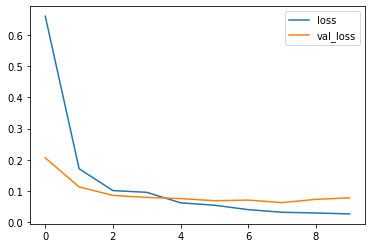

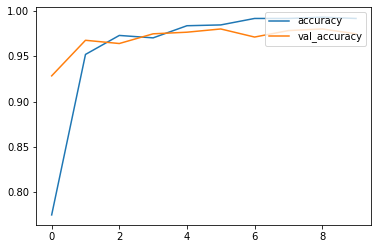

In [ ]:
#Evaluasi Model
model_DenseNet.evaluate(val_ds)

plt.figure()
plt.plot(history_DenseNet.history['loss'])
plt.plot(history_DenseNet.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history_DenseNet.history['accuracy'])
plt.plot(history_DenseNet.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

Kemudian kita lihat evaluasi model yang sudah kita latih sebelumnya. Evaluasi model ini berguna untuk memastikan apakah model yang kita latih atau yang ingin kita gunakan memiliki performa yang bagus atau kurang bagus

#### DenseNet-201 (RMSprop)

In [ ]:
# Training model
history_DenseNet_3 = model_DenseNet_3.fit(train_ds , validation_data = val_ds , epochs = 10)

Epoch 1/10
70/70 [==============================] - 93s 953ms/step - loss: 1.6551 - accuracy: 0.2937 - val_loss: 6804640.5000 - val_accuracy: 0.3214
Epoch 2/10
70/70 [==============================] - 60s 855ms/step - loss: 1.4328 - accuracy: 0.3241 - val_loss: 44.2124 - val_accuracy: 0.3214
Epoch 3/10
70/70 [==============================] - 59s 844ms/step - loss: 1.3505 - accuracy: 0.3536 - val_loss: 4.3089 - val_accuracy: 0.3964
Epoch 4/10
70/70 [==============================] - 59s 841ms/step - loss: 1.3346 - accuracy: 0.3688 - val_loss: 12.7051 - val_accuracy: 0.3982
Epoch 5/10
70/70 [==============================] - 59s 843ms/step - loss: 1.3174 - accuracy: 0.3732 - val_loss: 1.5785 - val_accuracy: 0.2696
Epoch 6/10
70/70 [==============================] - 59s 840ms/step - loss: 1.3050 - accuracy: 0.3893 - val_loss: 1.3276 - val_accuracy: 0.3946
Epoch 7/10
70/70 [==============================] - 59s 837ms/step - loss: 1.3034 - accuracy: 0.3848 - val_loss: 3.5755 - val_accuracy

Kemudian kita lakukan training model DenseNet201 dengan optimizer RMSprop sebanyak 10 epoch. Pada hasil training didapatkan hasil training dengan data train dan data validasi

18/18 [==============================] - 10s 553ms/step - loss: 1.5590 - accuracy: 0.4214


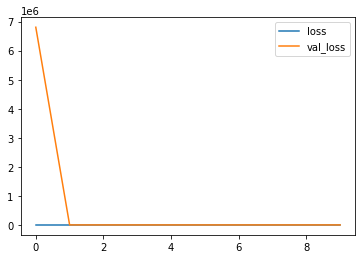

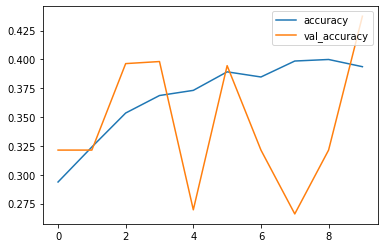

In [ ]:
#Evaluasi Model
model_DenseNet_3.evaluate(val_ds)

plt.figure()
plt.plot(history_DenseNet_3.history['loss'])
plt.plot(history_DenseNet_3.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history_DenseNet_3.history['accuracy'])
plt.plot(history_DenseNet_3.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

Kemudian kita lihat evaluasi model yang sudah kita latih sebelumnya. Evaluasi model ini berguna untuk memastikan apakah model yang kita latih atau yang ingin kita gunakan memiliki performa yang bagus atau kurang bagus

#### DenseNet-201 (Adagrad)

In [ ]:
# Training model
history_DenseNet_4 = model_DenseNet_4.fit(train_ds , validation_data = val_ds , epochs = 10)

Epoch 1/10
70/70 [==============================] - 79s 900ms/step - loss: 1.0405 - accuracy: 0.6058 - val_loss: 0.5851 - val_accuracy: 0.8786
Epoch 2/10
70/70 [==============================] - 59s 836ms/step - loss: 0.5266 - accuracy: 0.8786 - val_loss: 0.3059 - val_accuracy: 0.9554
Epoch 3/10
70/70 [==============================] - 59s 837ms/step - loss: 0.3435 - accuracy: 0.9205 - val_loss: 0.2184 - val_accuracy: 0.9518
Epoch 4/10
70/70 [==============================] - 59s 838ms/step - loss: 0.2357 - accuracy: 0.9455 - val_loss: 0.1622 - val_accuracy: 0.9661
Epoch 5/10
70/70 [==============================] - 59s 841ms/step - loss: 0.1997 - accuracy: 0.9509 - val_loss: 0.1321 - val_accuracy: 0.9679
Epoch 6/10
70/70 [==============================] - 59s 838ms/step - loss: 0.1641 - accuracy: 0.9554 - val_loss: 0.1255 - val_accuracy: 0.9661
Epoch 7/10
70/70 [==============================] - 58s 831ms/step - loss: 0.1451 - accuracy: 0.9625 - val_loss: 0.1179 - val_accuracy: 0.9696

Kemudian kita lakukan training model DenseNet201 dengan optimizer Adagrad sebanyak 10 epoch. Pada hasil training didapatkan hasil training dengan data train dan data validasi

18/18 [==============================] - 10s 548ms/step - loss: 0.0851 - accuracy: 0.9768


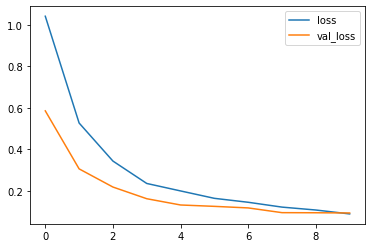

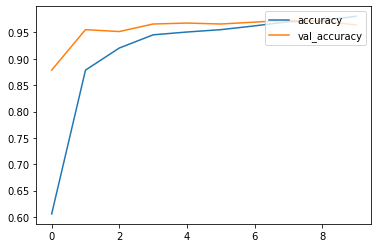

In [ ]:
#Evaluasi Model
model_DenseNet_4.evaluate(val_ds)

plt.figure()
plt.plot(history_DenseNet_4.history['loss'])
plt.plot(history_DenseNet_4.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history_DenseNet_4.history['accuracy'])
plt.plot(history_DenseNet_4.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

Kemudian kita lihat evaluasi model yang sudah kita latih sebelumnya. Evaluasi model ini berguna untuk memastikan apakah model yang kita latih atau yang ingin kita gunakan memiliki performa yang bagus atau kurang bagus

#### DenseNet-201 (Adamax)

In [ ]:
# Training model
history_DenseNet_5 = model_DenseNet_5.fit(train_ds , validation_data = val_ds , epochs = 10)

Epoch 1/10
70/70 [==============================] - 1679s 24s/step - loss: 0.2920 - accuracy: 0.8946 - val_loss: 0.3162 - val_accuracy: 0.9232
Epoch 2/10
70/70 [==============================] - 59s 838ms/step - loss: 0.0922 - accuracy: 0.9701 - val_loss: 0.1667 - val_accuracy: 0.9518
Epoch 3/10
70/70 [==============================] - 59s 838ms/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.1917 - val_accuracy: 0.9339
Epoch 4/10
70/70 [==============================] - 59s 839ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.1475 - val_accuracy: 0.9571
Epoch 5/10
70/70 [==============================] - 59s 834ms/step - loss: 0.0340 - accuracy: 0.9866 - val_loss: 0.1673 - val_accuracy: 0.9536
Epoch 6/10
70/70 [==============================] - 58s 832ms/step - loss: 0.0489 - accuracy: 0.9839 - val_loss: 0.2371 - val_accuracy: 0.9393
Epoch 7/10
70/70 [==============================] - 59s 833ms/step - loss: 0.0389 - accuracy: 0.9853 - val_loss: 0.1399 - val_accuracy: 0.9554

Kemudian kita lakukan training model DenseNet201 dengan optimizer Adamax sebanyak 10 epoch. Pada hasil training didapatkan hasil training dengan data train dan data validasi

18/18 [==============================] - 10s 553ms/step - loss: 0.1397 - accuracy: 0.9696


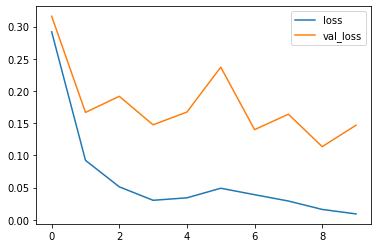

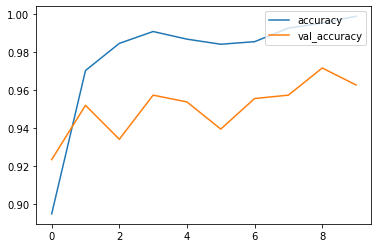

In [ ]:
#Evaluasi Model
model_DenseNet_5.evaluate(val_ds)

plt.figure()
plt.plot(history_DenseNet_5.history['loss'])
plt.plot(history_DenseNet_5.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history_DenseNet_5.history['accuracy'])
plt.plot(history_DenseNet_5.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

Kemudian kita lihat evaluasi model yang sudah kita latih sebelumnya. Evaluasi model ini berguna untuk memastikan apakah model yang kita latih atau yang ingin kita gunakan memiliki performa yang bagus atau kurang bagus

#### DenseNet-201 (Adadelta)

In [ ]:
# Training model
history_DenseNet_6 = model_DenseNet_6.fit(train_ds , validation_data = val_ds , epochs = 10)

Epoch 1/10
70/70 [==============================] - 629s 8s/step - loss: 1.5744 - accuracy: 0.2545 - val_loss: 1.5302 - val_accuracy: 0.2643
Epoch 2/10
70/70 [==============================] - 67s 958ms/step - loss: 1.4793 - accuracy: 0.3027 - val_loss: 1.4325 - val_accuracy: 0.3018
Epoch 3/10
70/70 [==============================] - 59s 845ms/step - loss: 1.3876 - accuracy: 0.3513 - val_loss: 1.3592 - val_accuracy: 0.3321
Epoch 4/10
70/70 [==============================] - 60s 861ms/step - loss: 1.3069 - accuracy: 0.3951 - val_loss: 1.2605 - val_accuracy: 0.3768
Epoch 5/10
70/70 [==============================] - 60s 851ms/step - loss: 1.2445 - accuracy: 0.4487 - val_loss: 1.1970 - val_accuracy: 0.4339
Epoch 6/10
70/70 [==============================] - 59s 845ms/step - loss: 1.1786 - accuracy: 0.4799 - val_loss: 1.1292 - val_accuracy: 0.5232
Epoch 7/10
70/70 [==============================] - 69s 978ms/step - loss: 1.1025 - accuracy: 0.5509 - val_loss: 1.0525 - val_accuracy: 0.5911
E

Kemudian kita lakukan training model DenseNet201 dengan optimizer Adadelta sebanyak 10 epoch. Pada hasil training didapatkan hasil training dengan data train dan data validasi

18/18 [==============================] - 10s 543ms/step - loss: 0.9140 - accuracy: 0.7375


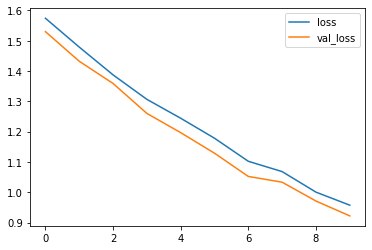

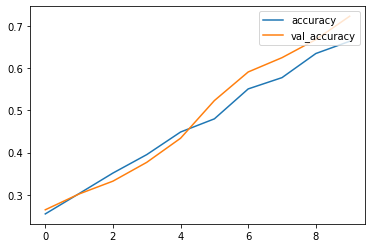

In [ ]:
#Evaluasi Model
model_DenseNet_6.evaluate(val_ds)

plt.figure()
plt.plot(history_DenseNet_6.history['loss'])
plt.plot(history_DenseNet_6.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history_DenseNet_6.history['accuracy'])
plt.plot(history_DenseNet_6.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

Kemudian kita lihat evaluasi model yang sudah kita latih sebelumnya. Evaluasi model ini berguna untuk memastikan apakah model yang kita latih atau yang ingin kita gunakan memiliki performa yang bagus atau kurang bagus

#### DenseNet-201 (Adam)

In [ ]:
# Training model
history_DenseNet_7 = model_DenseNet_7.fit(train_ds , validation_data = val_ds , epochs = 10)

Epoch 1/10
70/70 [==============================] - 80s 877ms/step - loss: 0.4677 - accuracy: 0.8286 - val_loss: 2.3188 - val_accuracy: 0.5679
Epoch 2/10
70/70 [==============================] - 59s 839ms/step - loss: 0.2749 - accuracy: 0.8978 - val_loss: 1.8986 - val_accuracy: 0.6357
Epoch 3/10
70/70 [==============================] - 59s 839ms/step - loss: 0.2108 - accuracy: 0.9263 - val_loss: 0.5424 - val_accuracy: 0.8089
Epoch 4/10
70/70 [==============================] - 59s 841ms/step - loss: 0.2151 - accuracy: 0.9268 - val_loss: 1.1492 - val_accuracy: 0.7214
Epoch 5/10
70/70 [==============================] - 58s 831ms/step - loss: 0.2241 - accuracy: 0.9201 - val_loss: 0.8825 - val_accuracy: 0.7518
Epoch 6/10
70/70 [==============================] - 58s 829ms/step - loss: 0.1888 - accuracy: 0.9344 - val_loss: 0.8470 - val_accuracy: 0.7786
Epoch 7/10
70/70 [==============================] - 58s 823ms/step - loss: 0.1593 - accuracy: 0.9451 - val_loss: 0.5356 - val_accuracy: 0.8268

Kemudian kita lakukan training model DenseNet201 dengan optimizer Adam sebanyak 10 epoch. Pada hasil training didapatkan hasil training dengan data train dan data validasi

18/18 [==============================] - 10s 524ms/step - loss: 0.6608 - accuracy: 0.8393


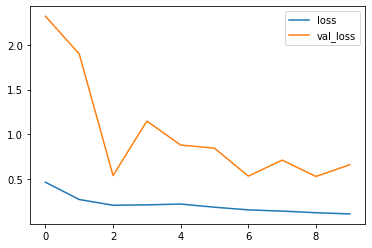

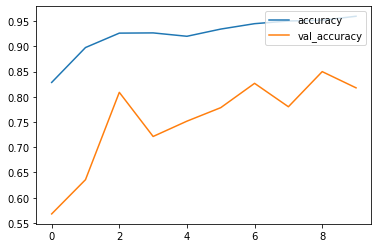

In [ ]:
#Evaluasi Model
model_DenseNet_7.evaluate(val_ds)

plt.figure()
plt.plot(history_DenseNet_7.history['loss'])
plt.plot(history_DenseNet_7.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history_DenseNet_7.history['accuracy'])
plt.plot(history_DenseNet_7.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

Kemudian kita lihat evaluasi model yang sudah kita latih sebelumnya. Evaluasi model ini berguna untuk memastikan apakah model yang kita latih atau yang ingin kita gunakan memiliki performa yang bagus atau kurang bagus

# 6. Submission

In [ ]:
# Deklarasi variabel data test dan file submission
sub_csv ='/content/drive/MyDrive/Dataset Colab/4animal/Sample_submission.csv'
dataset_test = '/content/drive/MyDrive/Dataset Colab/4animal/test/test'

Untuk membuat file submission, kita gunakan data pada folder test yang mana akan dimasukkan pada file Sample_submission.csv. file submissiion kita deklarasikan pada variabel sub_csv, dan file test deklarasikan pada variabel dataset_test

In [ ]:
# Membuat dataframe dari file submission
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


Kemudian kita buat dataframe dari file csv tadi yang kita deklarasikan pada variabel sub_csv. Kemudian kita lihat 10 data teratasnya.

In [ ]:
# Melakukan prediksi dengan menggunakan model yang sudah dilatih dan disimpan pada variabel labels

from tensorflow.keras.preprocessing.image import load_img

labels = []


for i in image_id:
    image = load_img(dataset_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    label = model_DenseNet_7.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))


Kemudian, kita lakukan prediksi dengan model yang sudah dilatih sebelumnya. Hasil prediksi tersebut akan disimpan pada variabel labels, dengan mengikuti ID dari datatest yang digunakan

In [ ]:
# Replace kolom label dengan list labels 
    
df_sub['Label'] = labels
df_sub.head(10)

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
5,6,1
6,7,3
7,8,0
8,9,3
9,10,2


Kemudian, kita timpa value pada kolom label dengan hasil prediksi kita pada variabel labels

In [ ]:
# Menyimpan dataframe yang sudah ditimpa pada file csv
df_sub.to_csv(dataset+'submission_file_adam.csv',index=False)

Lakukan save pada variabel dataframe dengan data hasil testing sebelumnya. File yang di save adalah file dengan ekstensi .csv